
<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## scikit learn for Prediction 

### scikit learn for Subsurface Modeling in Python 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

### PGE 383 Exercise: scikit learn for Subsurface Modeling in Python 

Here's a simple workflow, demonstration of scikit learn for subsurface modeling workflows. This should help you get started with building subsurface models that data analytics and machine learning. Here's some basic details about scikit learn.  

#### scikit learn

Demonstration of scikit learn for machine learning.

In this workflow we demonstrate the plug and play nature of scikit learn machine learning models.  

For an unconventional dataset we demonstrate the following steps:
    
    1. instantiation
    2. fitting
    3. prediction
    4. cross validation

We will work with the following regression methods:

* linear regression
* multilinear regression
* decision tree regression
* support vector machine regression

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

There are examples below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

#### Import Required Packages

Let's import the GeostatsPy package.

In [1]:
import os                                                 # to set current working directory 
import math                                               # basic calculations like square root
from sklearn.model_selection import train_test_split      # train and test split
from sklearn import svm                                   # support vector machine methods
from sklearn import tree                                  # tree program from scikit learn (package for machine learning)
from sklearn.metrics import mean_squared_error, r2_score  # specific measures to check our models
import pandas as pd                                       # DataFrames and plotting
import pandas.plotting as pd_plot
import numpy as np                                        # arrays and matrix math
import matplotlib.pyplot as plt                           # plotting
from intake import cat                                    # data catalogue

#### Declare functions

Let's define a couple of functions to streamline plotting correlation matrices and visualization of a machine learning regression model responce over the 2 predictor features. 

In [2]:
def plot_corr(dataframe,size=10):                         # plots a graphical correlation matrix 
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')
    plt.title('Correlation Matrix')
    
def visualize_model(model,xfeature,yfeature,response,title,):# plots the data points and the decision tree prediction 
    n_classes = 10
    cmap = plt.cm.RdYlBu
    plot_step = 0.02
    x_min, x_max = min(xfeature) - 1, max(xfeature) + 1
    y_min, y_max = min(yfeature) - 1, max(yfeature) + 1
    resp_min = round(min(response)); resp_max = round(max(response));
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
    z_min = round(min(response)); z_max = round(max(response))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap,vmin=z_min, vmax=z_max)

    im = plt.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
    plt.title(title)
    plt.xlabel(xfeature.name)
    plt.ylabel(yfeature.name)
    cbar = plt.colorbar(im, orientation = 'vertical')
    cbar.set_label(response.name, rotation=270, labelpad=20)
    return(plt)


#### Read the data table

In [3]:
my_data = cat.unconv_MV().read()                    # load the comma delimited data file

Let's visualize the first several rows of our data stored in a DataFrame so we can make sure we successfully loaded the data file.

In [4]:
my_data.head()                                            # preview the first 5 rows of the dataframe

,WellIndex,Por,LogPerm,AI,Brittle,TOC,VR,Production
0,1,15.91,1.67,3.06,14.05,1.36,1.85,177.381958
1,2,15.34,1.65,2.60,31.88,1.37,1.79,1479.767778
2,3,20.45,2.02,3.13,63.67,1.79,2.53,4421.221583
3,4,11.95,1.14,3.90,58.81,0.40,2.03,1488.317629
4,5,19.53,1.83,2.57,43.75,1.40,2.11,5261.094919


Let's remove the well index and check the summary summary statistics.

In [5]:
my_data = my_data.iloc[:,1:8]                             # copy all rows and columns 1 through 8, note 0 column is removed
my_data.describe().transpose()                            # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,14.950460,3.029634,5.400000,12.85750,14.98500,17.080000,24.65000
LogPerm,1000.0,1.398880,0.405966,0.120000,1.13000,1.39000,1.680000,2.58000
AI,1000.0,2.982610,0.577629,0.960000,2.57750,3.01000,3.360000,4.70000
Brittle,1000.0,49.719480,15.077006,-10.500000,39.72250,49.68000,59.170000,93.47000
TOC,1000.0,1.003810,0.504978,-0.260000,0.64000,0.99500,1.360000,2.71000
VR,1000.0,1.991170,0.308194,0.900000,1.81000,2.00000,2.172500,2.90000
Production,1000.0,2247.295809,1464.256312,2.713535,1191.36956,1976.48782,3023.594214,12568.64413


It is good that we checked the summary statistics, because we have some negative values for brittleness and total organic carbon. The is physically imposible.  The values must be in error. We know the lowest possible values are 0.0, so we will truncate on 0.0.  We use the *get_numerical_data()* DataFrame member function to get a shallow copy of the data from the DataFrame.  Since it is a shallow copy, any changes we make to the copy are made to the data in the original DataFrame.  This allows us to apply this simple conditional statement to all the data values in the DataFrame all at once.

In [6]:
num = my_data._get_numeric_data()                         # get the numerical values
num[num < 0] = 0                                          # truncate negative values to 0.0
my_data.describe().transpose()                            # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,14.950460,3.029634,5.400000,12.85750,14.98500,17.080000,24.65000
LogPerm,1000.0,1.398880,0.405966,0.120000,1.13000,1.39000,1.680000,2.58000
AI,1000.0,2.982610,0.577629,0.960000,2.57750,3.01000,3.360000,4.70000
Brittle,1000.0,49.731480,15.033593,0.000000,39.72250,49.68000,59.170000,93.47000
TOC,1000.0,1.006170,0.499838,0.000000,0.64000,0.99500,1.360000,2.71000
VR,1000.0,1.991170,0.308194,0.900000,1.81000,2.00000,2.172500,2.90000
Production,1000.0,2247.295809,1464.256312,2.713535,1191.36956,1976.48782,3023.594214,12568.64413


This dataset has variables from 1,000 unconventional wells including well average porosity, log transform of permeability (to linearize the relationships with other variables), accoustic impedance (kg/m2s*10^6), brittness ratio (%), total organic carbon (%), vitrinite reflectance (%), and initial production 90 day average (MCFPD).  Note, the dataset is synthetic.

#### Calculate the correlation matrix 

For multivariate analysis it is a good idea to check the correlation matrix.  We can calculate it and view it in the console with these commands.

In [7]:
corr_matrix = np.corrcoef(my_data, rowvar = False)
print(np.around(corr_matrix,2))                           # print the correlation matrix to 2 decimals

[[ 1.    0.81 -0.51 -0.25  0.71  0.08  0.69]
 [ 0.81  1.   -0.32 -0.15  0.51  0.05  0.57]
 [-0.51 -0.32  1.    0.17 -0.55  0.49 -0.33]
 [-0.25 -0.15  0.17  1.   -0.24  0.3  -0.07]
 [ 0.71  0.51 -0.55 -0.24  1.    0.31  0.5 ]
 [ 0.08  0.05  0.49  0.3   0.31  1.    0.14]
 [ 0.69  0.57 -0.33 -0.07  0.5   0.14  1.  ]]


Note the 1.0 diagonal resulting from the correlation of each variable with themselves.  

Let's use our function declared above to make a graphical correlation matrix visualization.  This may inprove our ability to spot features.  It relies on the built in correlation matrix method with Numpy DataFrames and MatPlotLib for plotting.

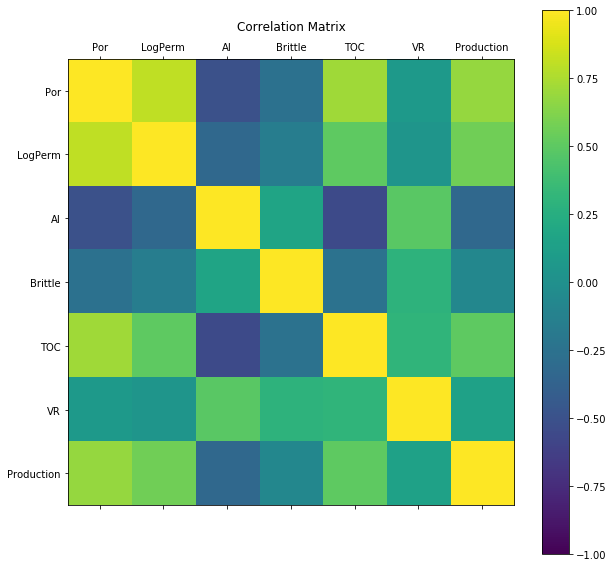

In [8]:
plot_corr(my_data,10)                                      # using our correlation matrix visualization function
plt.show()

This looks good.  There is a mix of correlation magnitudes. Of course, correlation coeffficients are limited to degree of linear correlations.  For more complete information, let's look at the matrix scatter plot from the Pandas package. 

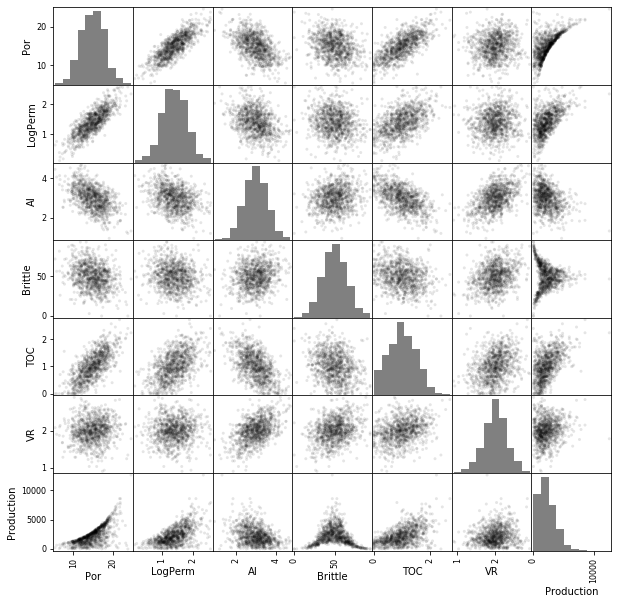

In [9]:
pd_plot.scatter_matrix(my_data, alpha = 0.1,              # pandas matrix scatter plot
    figsize=(10, 10),color = 'black', hist_kwds={'color':['grey']})
plt.show()

#### Working with Only Two Predictor Features

Let's simplify the problem to 2 features, Porosity and Brittleness, to predict one response feature, Production rate.  We will also reduce the number of wells from 1,000 to 500.  By working with only 2 predictor features, it is very easy to visualize the segmentation of the feature space (it is only 2D and the model can be interogated exhaustively on a single plot).

In [10]:
X = my_data.iloc[0:500,[0,3]]              # extract porosity and brittleness 500 samples to a predictor array
y = my_data.iloc[0:500,[6]]                # extract production 500 samples to a response array

Let's check the summary statistics of the predictor and response features.

In [11]:
X.describe().transpose()                   # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,500.0,14.89936,2.985967,5.4,12.8500,14.900,17.0125,23.85
Brittle,500.0,49.74682,15.212123,0.0,39.3125,49.595,59.2075,93.47


In [12]:
y.describe().transpose()                   # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Production,500.0,2203.936528,1392.003509,2.713535,1194.793253,1972.314641,2949.902179,8554.267033


Now let's withhold 100 samples as testing data and retain the remaining 400 as training data. 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73073)
n_train = len(X_train)
n_test = len(X_test)
print('Number of training ' + str(n_train) + ', number of test ' + str(n_test))

Number of training 400, number of test 100


Let's compare the univariate statistics of Porosity, Brittleness and Producton training and testing datasets.  
 
 * let's check for bias and extrapolation.

In [14]:
X_train.describe().transpose()                   # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,400.0,14.804475,3.040687,5.4,12.695,14.730,16.9825,23.85
Brittle,400.0,50.088575,15.457508,0.0,39.405,49.655,59.4725,93.47


In [15]:
X_test.describe().transpose()                   # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,100.0,15.2789,2.737716,9.24,13.4375,15.685,17.1375,21.91
Brittle,100.0,48.3798,14.179394,17.37,38.9900,49.085,57.2000,84.17


In [16]:
y_train.describe().transpose()                   # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Production,400.0,2171.603176,1401.268206,2.713535,1181.572336,1930.172553,2903.062331,8554.267033


In [17]:
y_test.describe().transpose()                   # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Production,100.0,2333.269934,1353.449905,180.364231,1261.803516,2362.351893,3247.269411,7887.843585


Now let's plot the training and testing dataset distributions to check coverage and extrapolation.

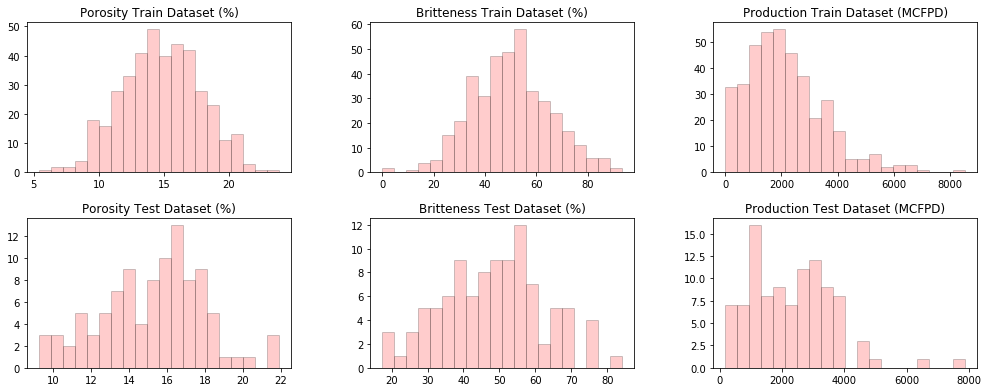

In [18]:
plt.subplot(231)
plt.hist(X_train["Por"], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Porosity Train Dataset (%)')

plt.subplot(232)
plt.hist(X_train["Brittle"], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Britteness Train Dataset (%)')

plt.subplot(233)
plt.hist(y_train["Production"], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Production Train Dataset (MCFPD)')

plt.subplot(234)
plt.hist(X_test["Por"], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Porosity Test Dataset (%)')

plt.subplot(235)
plt.hist(X_test["Brittle"], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Britteness Test Dataset (%)')

plt.subplot(236)
plt.hist(y_test["Production"], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Production Test Dataset (MCFPD)')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.3, hspace=0.3)
plt.show()

The distributions are well behaved, we cannot observe obvious gaps nor truncations.  

Let's look at a scatter plot of Porosity vs. Brittleness with points colored by Production.  

* Let's plot the training and testing datasets to check coverage and extrapolation in the features space.

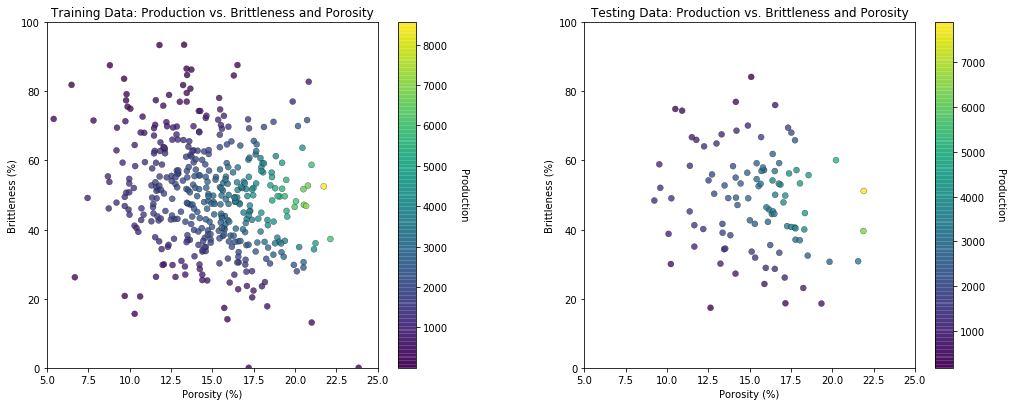

In [19]:
plt.subplot(121)
im = plt.scatter(X_train["Por"],X_train["Brittle"],s=None, c=y_train["Production"], marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
plt.title('Training Data: Production vs. Brittleness and Porosity'); plt.xlabel('Porosity (%)'); plt.ylabel('Brittleness (%)')
cbar = plt.colorbar(im, orientation = 'vertical'); plt.xlim(5,25); plt.ylim(0,100)
cbar.set_label("Production", rotation=270, labelpad=20)

plt.subplot(122)
im = plt.scatter(X_test["Por"],X_test["Brittle"],s=None, c=y_test["Production"], marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
plt.title('Testing Data: Production vs. Brittleness and Porosity'); plt.xlabel('Porosity (%)'); plt.ylabel('Brittleness (%)')
cbar = plt.colorbar(im, orientation = 'vertical'); plt.xlim(5,25); plt.ylim(0,100)
cbar.set_label("Production", rotation=270, labelpad=20)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

#### Building a Linear Regression Model

Let's build our first machine learning model with scikit learn.  We will start with linear regression.  For this model we will pick one predictor feature and one response feature.  

Coefficients:  313.565, Intercept:  -2470.558


(5, 25)

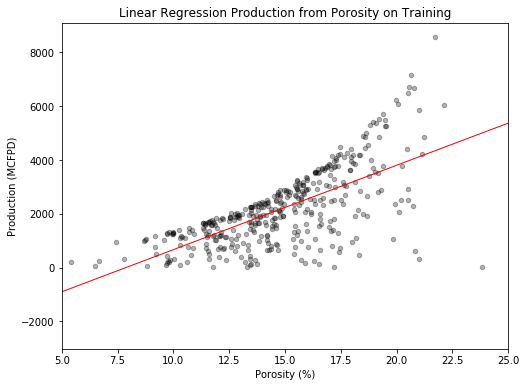

In [20]:
# Linear Regression Model with scikit learn
from sklearn import linear_model

# Step 1. Instantiate the Model 
linear_reg = linear_model.LinearRegression()

# Step 2: Fit the Data on Training Data
linear_reg.fit(X_train["Por"].values.reshape(n_train,1), y_train["Production"]) # fit model
porosity_model = np.linspace(0.0,30.0,10)

# Print the model parameters
production_model = linear_reg.predict(porosity_model.reshape(10,1)) # predict with the fit model
print('Coefficients: ', str(round(linear_reg.coef_[0],3)) + ', Intercept: ', str(round(linear_reg.intercept_,3))) 

# Plot model fit
plt.figure(figsize=(8,6))
plt.scatter(X_train["Por"].values, y_train["Production"],  color='black', s = 20, alpha = 0.3)
plt.plot(porosity_model,production_model, color='red', linewidth=1)
plt.title('Linear Regression Production from Porosity on Training'); plt.xlabel('Porosity (%)'); plt.ylabel('Production (MCFPD)')
plt.xlim(5,25)#; plt.ylim(0,1500000)

Variance explained: 0.46


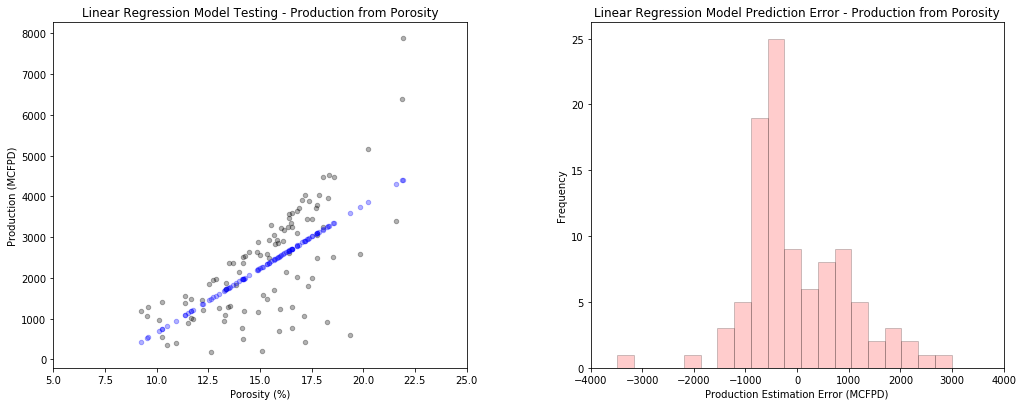

In [21]:
# Step 3: - Make predictions using the testing dataset
y_pred = linear_reg.predict(X_test['Por'].values.reshape(n_test,1))

# Report the goodness of fit
print('Variance explained: %.2f' % r2_score(y_test, y_pred))

# Plot testing diagnostics 
plt.subplot(121)
plt.scatter(X_test['Por'].values, y_test['Production'].values,  color='black', s = 20, alpha = 0.3)
plt.scatter(X_test['Por'], y_pred, color='blue', s = 20, alpha = 0.3)
plt.title('Linear Regression Model Testing - Production from Porosity'); plt.xlabel('Porosity (%)'); plt.ylabel('Production (MCFPD)')
plt.xlim(5,25)#; plt.ylim(0,1500000)

y_res = y_pred - y_test['Production'].values

plt.subplot(122)
plt.hist(y_res, alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Linear Regression Model Prediction Error - Production from Porosity'); plt.xlabel('Production Estimation Error (MCFPD)'); plt.ylabel('Frequency')
plt.xlim(-4000,4000)#; plt.ylim(0,1500000)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

#### Building a Multilinear Regression Model

Let's build our second machine learning model with scikit learn.  We will work with multilinear regression!  We will use both predictor features, porosity and brittleness, and one response feature, production.  

Porosity Coef:  318.966, Brittleness Coef:  4.158, Intercept:  -2758.817


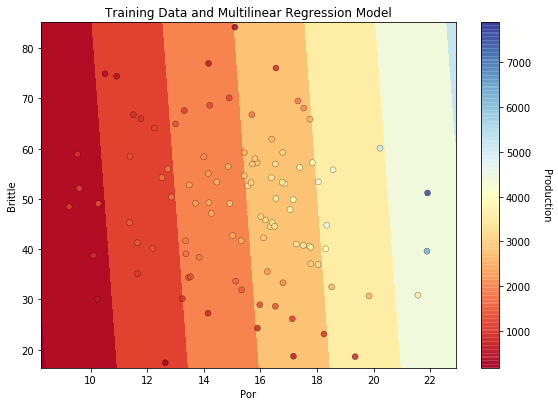

In [22]:
# Linear Regression Model with scikit learn
from sklearn import linear_model

# Step 1. Instantiate the Model 
multilinear_reg = linear_model.LinearRegression()

# Step 2: Fit the Data on Training Data
multilinear_reg.fit(X_train.values.reshape(n_train,2), y_train["Production"]) # fit model

# Print the model parameters
print('Porosity Coef: ', str(round(multilinear_reg.coef_[0],3)) + ', Brittleness Coef: ', str(round(multilinear_reg.coef_[1],3)) + ', Intercept: ', str(round(multilinear_reg.intercept_,3))) 

# Plot model fit
plt.subplot(111)
plt = visualize_model(multilinear_reg,X_test["Por"],X_test["Brittle"],y_test["Production"],'Training Data and Multilinear Regression Model')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()


Variance explained: 0.47


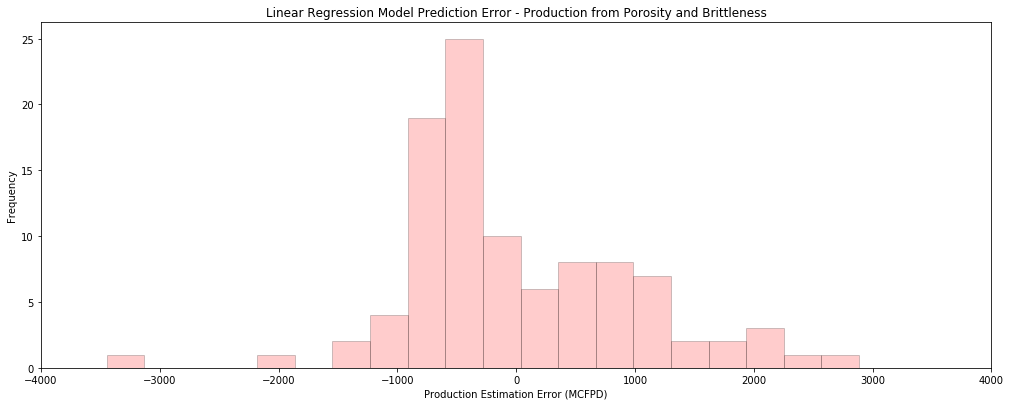

In [23]:
# Step 3: - Make predictions using the testing dataset
y_pred = multilinear_reg.predict(X_test.values.reshape(n_test,2))

# Report the goodness of fit
print('Variance explained: %.2f' % r2_score(y_test, y_pred))

y_res = y_pred - y_test['Production'].values

plt.subplot(111)
plt.hist(y_res, alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Linear Regression Model Prediction Error - Production from Porosity and Brittleness'); plt.xlabel('Production Estimation Error (MCFPD)'); plt.ylabel('Frequency')
plt.xlim(-4000,4000)#; plt.ylim(0,1500000)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

Including brittleness only resulted in a slight improvement.  

* due to the nonlinear nature of brittleness

#### Building a Decision Tree Regression Model

Let's build our third machine learning model with scikit learn.  We will work with a decision tree.  We will use both predictor features, porosity and brittleness, and one response feature, production.

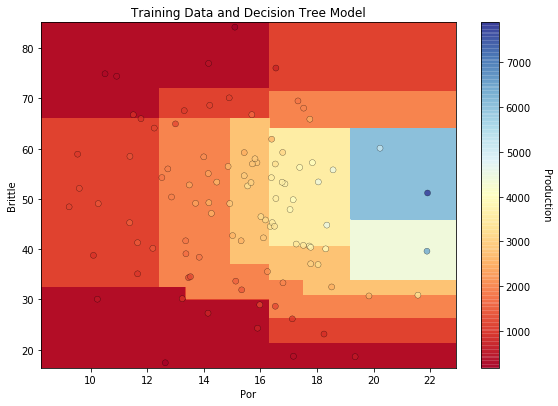

In [24]:
# Decison Tree Model with scikit learn
from sklearn.tree import tree                                     # for accessing tree information

# Step 1. Instantiate the Model 
decision_tree_reg = tree.DecisionTreeRegressor(min_samples_leaf=5, max_depth = 5)

# Step 2: Fit the Data on Training Data
decision_tree_reg.fit(X_train.values.reshape(n_train,2), y_train["Production"]) # fit model

# Plot model fit
plt.subplot(111)
plt = visualize_model(decision_tree_reg,X_test["Por"],X_test["Brittle"],y_test["Production"],'Training Data and Decision Tree Model')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

Variance explained: 0.88


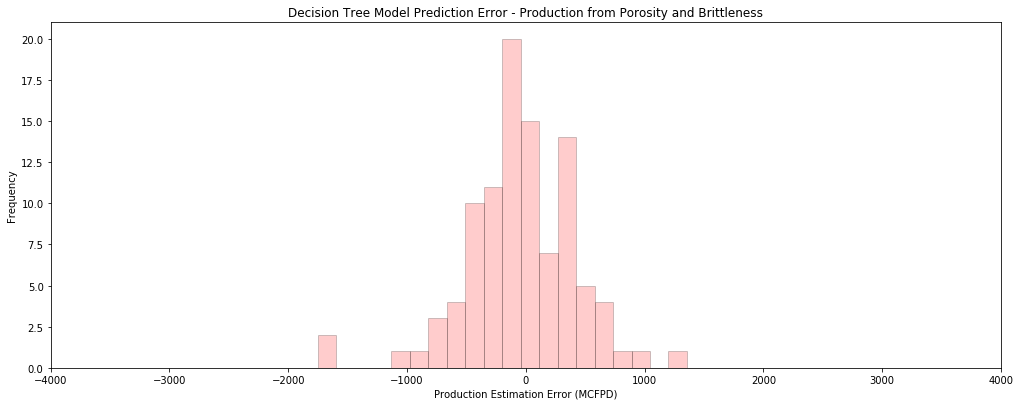

In [25]:
# Step 3: - Make predictions using the testing dataset
y_pred = decision_tree_reg.predict(X_test.values.reshape(n_test,2))

# Report the goodness of fit
print('Variance explained: %.2f' % r2_score(y_test, y_pred))

y_res = y_pred - y_test['Production'].values

plt.subplot(111)
plt.hist(y_res, alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Decision Tree Model Prediction Error - Production from Porosity and Brittleness'); plt.xlabel('Production Estimation Error (MCFPD)'); plt.ylabel('Frequency')
plt.xlim(-4000,4000)#; plt.ylim(0,1500000)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

#### Building a Support Vector Machine Regression Model

Let's build our fourth machine learning model with scikit learn.  We will work with a support vector machine!  We will use both predictor features, porosity and brittleness, and one response feature, production.  

/Users/john/miniconda3/envs/Daytum/lib/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


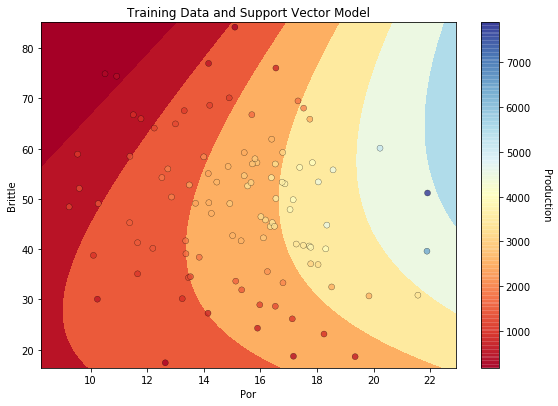

In [26]:
# Support Vector Regression Model with scikit learn
from sklearn import linear_model

# Step 1. Instantiate the Model 
support_vector_reg = svm.SVR(kernel='poly', C=0.01, gamma='auto', degree=2, epsilon=.01,coef0=1,max_iter=1000)

# Step 2: Fit the Data on Training Data
support_vector_reg.fit(X_train.values.reshape(n_train,2), y_train["Production"]) # fit model

# Plot model fit
plt.subplot(111)
plt = visualize_model(support_vector_reg,X_test["Por"],X_test["Brittle"],y_test["Production"],'Training Data and Support Vector Model')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()


Variance explained: 0.65


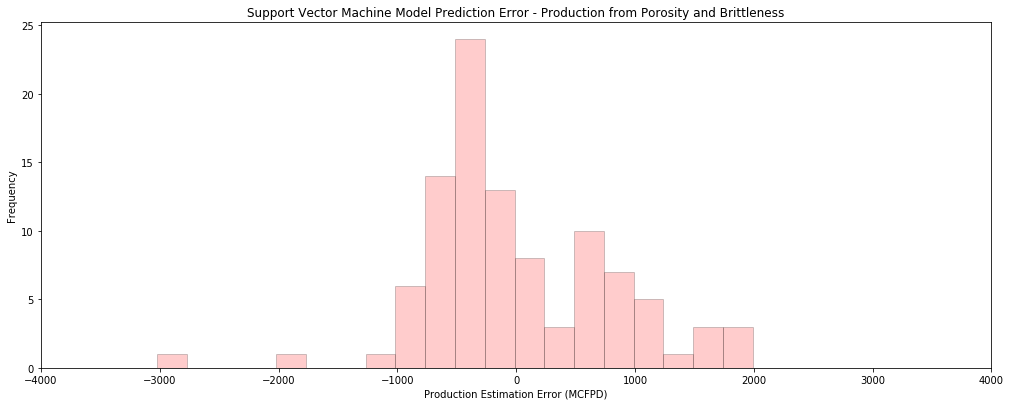

In [27]:
# Step 3: - Make predictions using the testing dataset
y_pred = support_vector_reg.predict(X_test.values.reshape(n_test,2))

# Report the goodness of fit
print('Variance explained: %.2f' % r2_score(y_test, y_pred))

y_res = y_pred - y_test['Production'].values

plt.subplot(111)
plt.hist(y_res, alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Support Vector Machine Model Prediction Error - Production from Porosity and Brittleness'); plt.xlabel('Production Estimation Error (MCFPD)'); plt.ylabel('Frequency')
plt.xlim(-4000,4000)#; plt.ylim(0,1500000)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

I'll end here for brevity, but I invite you to continue. There are many other scikit learn methods to explore and there are further opportunities for model cross validation and hyperparameter tuning.  

### Summary 

Here's some observations from this workflow.

* scikit learn is a flexible toolkit

* we are able to easily plug and play with a variety of methods in our workflows

#### Comments

This was a basic demonstration of time series analysis, modeling and forecasting. 

The Texas Center for Geostatistics has many other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available [here](https://github.com/GeostatsGuy/PythonNumericalDemos), along with a package for geostatistics in Python called [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy). 
  
We hope this was helpful,

*Michael*

***

#### More on Michael Pyrcz and the Texas Center for Geostatistics:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
